
Female User - Distribution of listening events by user

In [ ]:

import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
USER_DATA_FILE = 'output-4.txt'                    # Text file containing user data (including both genders m,f)
STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'   # output file for statistics

# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf['idx_users']).astype(np.int64)[ :55772]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()



    # Read gender and filter only female information from user data file
    # Assuming user data file is a text file with each row representing a user's data
    user_data = np.loadtxt(user_data_file, dtype=np.str)

    gender_ids = (user_data[:, 2] == 'f').astype(np.int64) # Assuming the gender information is in the third column



    # Filter users based on gender(female)
    female_user_ids = user_ids[gender_ids == 1][ :55772]

    user_indices = np.where(np.isin(user_ids, female_user_ids))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]


    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, female_user_ids, artist_ids

if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, female_user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print ('Female Users: ', len(female_user_ids))
    print ('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to no of listeners each artist has
    pc_sum = np.zeros((len(female_user_ids)), dtype=np.int32)
    pc_uniqe_artist = np.zeros((len(female_user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(female_user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(female_user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(female_user_ids)), dtype=np.float32)

    for i in range(0, len(female_user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniqe_artist[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    " Playcount: " + str(pc_sum[i]) +
                                    "   artists: " + str(pc_uniqe_artist[i]) + \
                                    "   Mean PC/artists: " + str(pc_mean[i]) + \
                                    "   Std. PC/artists: " + str(pc_std[i]) + \
                                    "   Median PC/artists: " + str(pc_median[i]))

    # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE, np.column_stack((pc_sum, pc_uniqe_artist, pc_mean, pc_std, pc_median)), fmt="%.3f")



<ipython-input-20-d39dbbd8ed30>:25: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str)


Streaming output truncated to the last 5000 lines.
User 10802 Playcount: 5441   artists: 372   Mean PC/artists: 14.626344   Std. PC/artists: 34.179832   Median PC/artists: 2.0
User 10803 Playcount: 325   artists: 93   Mean PC/artists: 3.4946237   Std. PC/artists: 5.0473537   Median PC/artists: 1.0
User 10804 Playcount: 2106   artists: 97   Mean PC/artists: 21.71134   Std. PC/artists: 31.33555   Median PC/artists: 8.0
User 10805 Playcount: 309   artists: 112   Mean PC/artists: 2.7589285   Std. PC/artists: 3.3494284   Median PC/artists: 1.0
User 10806 Playcount: 6407   artists: 406   Mean PC/artists: 15.780788   Std. PC/artists: 34.678734   Median PC/artists: 2.0
User 10807 Playcount: 18799   artists: 1556   Mean PC/artists: 12.081619   Std. PC/artists: 17.347252   Median PC/artists: 4.0
User 10808 Playcount: 19955   artists: 1174   Mean PC/artists: 16.997444   Std. PC/artists: 31.88615   Median PC/artists: 4.0
User 10809 Playcount: 17423   artists: 411   Mean PC/artists: 42.391727   Std

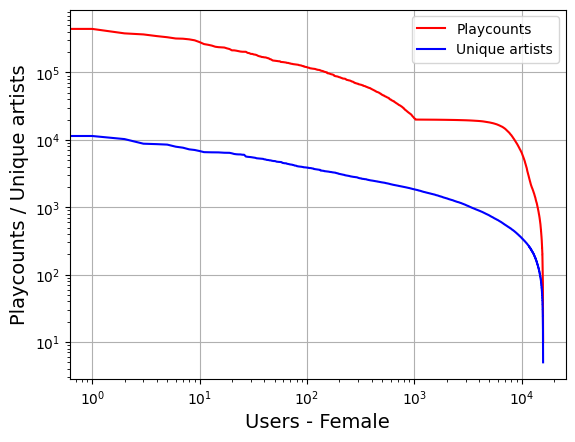

Avg_playcount =  13775.756106821922
Sdev_playcount =  19630.82552337396
Avg_artists =  699.1641564358941
Sdev_artists =  718.2424190488099
Avg_MeanPC =  28.957098911530185
Sdev_MeanPC =  72.23922833274797
Avg_MedianPC =  6.670896089102645
Sdev_MedianPC =  38.288209814882485


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'         # output file for statistics (female data)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])
#    plt.title('Artist-based statistics', fontsize=18)
    plt.xlabel('Users - Female', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)


Male Users - Distribution of listening events by user

In [ ]:
import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
USER_DATA_FILE = 'output-4.txt'                    # Text file containing user data (including m, f gender)
STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'   # output file for statistics

# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf['idx_users']).astype(np.int64)[ :55772]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()



    # Read gender information and filter male data from user data file
    user_data = np.loadtxt(user_data_file, dtype=np.str) # Assuming user data file is a text file with each row representing a user's data
    #user_data = np.genfromtxt(user_data_file, dtype=np.str, missing_values='NA')
    gender_ids = (user_data[:, 2] == 'm').astype(np.int64)         # Assuming the gender information is in the fourth column


    # Filter users based on gender (male)
    male_user_ids = user_ids[gender_ids == 1][ :55772]
    user_indices = np.where(np.isin(user_ids, male_user_ids))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]



    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, male_user_ids, artist_ids

if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, male_user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print ('Male Users: ', len(male_user_ids))
    print ('Artists: ', len(artist_ids))

    # Compute some basic statistics
    pc_sum = np.zeros((len(male_user_ids)), dtype=np.int32)
    pc_uniq_artists = np.zeros((len(male_user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(male_user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(male_user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(male_user_ids)), dtype=np.float32)

    for i in range(0, len(male_user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniq_artists[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    "   Playcount: " + str(pc_sum[i]) +
                                    "   Unique artists: " + str(pc_uniq_artists[i]) + \
                                    "   Mean PC/artist: " + str(pc_mean[i]) + \
                                    "   Std. PC/artist: " + str(pc_std[i]) + \
                                    "   Median PC/artist: " + str(pc_median[i]))

    # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE, np.column_stack((pc_sum, pc_uniq_artists, pc_mean, pc_std, pc_median)), fmt="%.3f")


<ipython-input-23-541484dc8466>:23: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str) # Assuming user data file is a text file with each row representing a user's data


Streaming output truncated to the last 5000 lines.
User 34969   Playcount: 2120   Unique artists: 129   Mean PC/artist: 16.434109   Std. PC/artist: 24.291462   Median PC/artist: 5.0
User 34970   Playcount: 5043   Unique artists: 579   Mean PC/artist: 8.709845   Std. PC/artist: 30.827877   Median PC/artist: 1.0
User 34971   Playcount: 1162   Unique artists: 130   Mean PC/artist: 8.938461   Std. PC/artist: 17.366526   Median PC/artist: 2.0
User 34972   Playcount: 2738   Unique artists: 361   Mean PC/artist: 7.5844874   Std. PC/artist: 12.945194   Median PC/artist: 2.0
User 34973   Playcount: 563   Unique artists: 200   Mean PC/artist: 2.815   Std. PC/artist: 3.3422709   Median PC/artist: 2.0
User 34974   Playcount: 1705   Unique artists: 626   Mean PC/artist: 2.723642   Std. PC/artist: 4.2428646   Median PC/artist: 1.0
User 34975   Playcount: 37969   Unique artists: 206   Mean PC/artist: 184.31554   Std. PC/artist: 503.5283   Median PC/artist: 26.5
User 34976   Playcount: 19400   Unique 

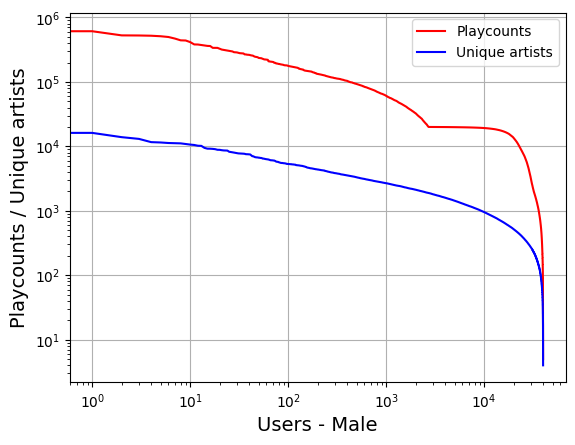

Avg_playcount =  14613.015461983037
Sdev_playcount =  21151.06484523365
Avg_artists =  742.8510345517776
Sdev_artists =  774.2178582788267
Avg_MeanPC =  27.908111661537692
Sdev_MeanPC =  46.90026020368784
Avg_MedianPC =  6.049475843778929
Sdev_MedianPC =  17.685385117214718


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'         # output file for statistics (male data)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])
#    plt.title('Artist-based statistics', fontsize=18)
    plt.xlabel('Users - Male', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)



Both Female and Male Users - Distribution of listening events by user

In [ ]:
import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
USER_DATA_FILE = 'output-4.txt'                    # Text file containing user data (including gender)
STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'   # output file for statistics

# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf['idx_users']).astype(np.int64)[:55772]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Read gender information from user data file and take both female & male data
    user_data = np.loadtxt(user_data_file, dtype=np.str) # Assuming user data file is a text file with each row representing a user's data
    gender_ids = np.isin(user_data[:, 2], ['f', 'm']).astype(np.int64)  # Include both female and male users

    # Filter users based on gender (both female and male)
    user_indices = np.where(gender_ids == 1)[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, user_ids[user_indices], artist_ids

if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print('Male and Female Users: ', len(user_ids))
    print('Artists: ', len(artist_ids))

    # Compute some basic statistics
    pc_sum = np.zeros((len(user_ids)), dtype=np.int32)
    pc_uniq_artists = np.zeros((len(user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(user_ids)), dtype=np.float32)

    for i in range(0, len(user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniq_artists[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    "   Playcount: " + str(pc_sum[i]) +
                                    "   Unique artists: " + str(pc_uniq_artists[i]) + \
                                    "   Mean PC/artist: " + str(pc_mean[i]) + \
                                    "   Std. PC/artist: " + str(pc_std[i]) + \
                                    "   Median PC/artist: " + str(pc_median[i]))

    # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE, np.column_stack((pc_sum, pc_uniq_artists, pc_mean, pc_std, pc_median)), fmt="%.3f")




<ipython-input-25-97f429c84ba8>:21: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str) # Assuming user data file is a text file with each row representing a user's data


Streaming output truncated to the last 5000 lines.
User 50771   Playcount: 7428   Unique artists: 178   Mean PC/artist: 41.730335   Std. PC/artist: 90.024185   Median PC/artist: 8.0
User 50772   Playcount: 737   Unique artists: 52   Mean PC/artist: 14.173077   Std. PC/artist: 18.160313   Median PC/artist: 9.5
User 50773   Playcount: 295   Unique artists: 147   Mean PC/artist: 2.0068028   Std. PC/artist: 1.8753561   Median PC/artist: 1.0
User 50774   Playcount: 10267   Unique artists: 336   Mean PC/artist: 30.556547   Std. PC/artist: 72.19284   Median PC/artist: 6.5
User 50775   Playcount: 19635   Unique artists: 1362   Mean PC/artist: 14.4163   Std. PC/artist: 35.096878   Median PC/artist: 2.0
User 50776   Playcount: 1586   Unique artists: 333   Mean PC/artist: 4.7627625   Std. PC/artist: 6.6761775   Median PC/artist: 3.0
User 50777   Playcount: 15985   Unique artists: 319   Mean PC/artist: 50.10972   Std. PC/artist: 91.29568   Median PC/artist: 10.0
User 50778   Playcount: 13274   Uni

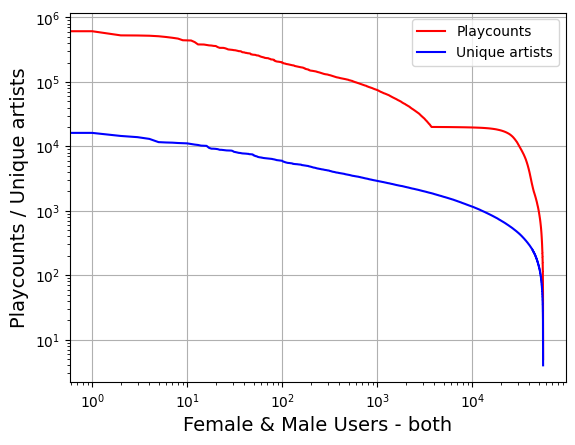

Avg_playcount =  14375.788725323197
Sdev_playcount =  20735.078511789154
Avg_artists =  730.4729160316293
Sdev_artists =  759.0326259052877
Avg_MeanPC =  28.205328790948702
Sdev_MeanPC =  55.2740133946119
Avg_MedianPC =  6.225547327464095
Sdev_MedianPC =  25.290309473784653


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'         # output file for statistics (female + male)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])
#    plt.title('Artist-based statistics', fontsize=18)
    plt.xlabel('Female & Male Users - both', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)